In [162]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

class BayesClassifier:
    def train(self,df):
        print("==== training")
        self.df = df
        self.D = {}
        for index, row in df.iterrows():
            if row[4] not in self.D.keys():
                self.D[row[4]] = []
            self.D[row[4]].append(np.array([row[0], row[1]]))
        self.n = {}
        self.Pc = {}
        self.miu = {}
        self.Z = {}
        self.cov = {}
        for key in self.D:
            self.n[key] = len(self.D[key])
            self.Pc[key] = self.n[key]/len(df)
            self.miu[key] = (1/self.n[key]) * np.sum(self.D[key],axis=0)
            self.Z[key] = self.D[key]-self.miu[key].transpose()
            self.cov[key] = 1/self.n[key] * np.dot(self.Z[key].transpose(), self.Z[key])
        print("==== train finished")

    def predict(self,x):
        self.x = x
        d = len(self.D[list(self.D.keys())[0]][0])
        res = {}
        for key in self.D:
            print(self.cov[key])
            Fi = ((1/((math.sqrt(2*math.pi)**d) * np.sqrt(np.linalg.det(self.cov[key])))) * np.exp(-((x-self.miu[key]).transpose().dot(np.linalg.inv(self.cov[key])).dot((x-self.miu[key])))/2))
            Total = Fi * self.Pc[key]
            res[key] = Total
        # print(res)
        # print(max(res, key=res.get))
        return max(res, key=res.get)
    def plot(self,arrayAxis):
        plt.figure(2, figsize=(8, 6))
        X = self.df.iloc[:, arrayAxis].values
        colors={'setosa':'red','versicolor':'blue','virginica':'black'}
        plt.xlabel(self.df.columns[arrayAxis[0]])
        plt.ylabel(self.df.columns[arrayAxis[1]])
        plt.scatter(X[:, 0], X[:, 1],edgecolor='k',c=self.df["species"].map(colors))
        plt.scatter(self.x[0],self.x[1],c='yellow')
        plt.show()


model = BayesClassifier()   

model.train(pd.read_csv('iris.csv'))
print(model.predict([5,3]))
# model.plot([0,1])

==== training
==== train finished
[[0.121764 0.098292]
 [0.098292 0.142276]]
[[0.261104 0.08348 ]
 [0.08348  0.0965  ]]
[[0.396256 0.091888]
 [0.091888 0.101924]]
setosa


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math


class NaiveBayesClassifier:
    def train(self, df):
        print("==== training")
        self.df = df
        self.D = {'setosa': [], 'others': []}
        for index, row in df.iterrows():
            # if row[4] not in self.D.keys():
            #     self.D[row[4]] = []
            if row[4] != 'setosa':
                row[4] = 'others'
            self.D[row[4]].append(np.array([row[0], row[1]]))
        self.n = {}
        self.Pc = {}
        self.miu = {}
        self.Z = {}
        self.var = {}
        for i, key in enumerate(self.D):
            self.n[key] = len(self.D[key])
            self.Pc[key] = self.n[key]/len(df)
            self.miu[key] = (1/self.n[key]) * sum(self.D[key])
            self.Z[key] = self.D[key]-self.miu[key].transpose()
            self.var[key] = np.diag(np.diag(1/self.n[key] *  self.Z[key].transpose().dot(self.Z[key])))

    def predict(self, x):
        self.x = x
        res = {}
        for i, key in enumerate(self.D):
            temp = 1
            for j in range(0, len(self.D[list(self.D.keys())[0]][0])):
                temp = temp * (1/(math.sqrt(2*math.pi)*math.sqrt(self.var[key][j, j]))*np.exp(-((x[j]-self.miu[key][j])**2)/(2*self.var[key][j, j])))
            Total = self.Pc[key] * temp
            res[key] = Total
        return max(res, key=res.get)

    def plot(self, arrayAxis):
        plt.figure(2, figsize=(8, 6))
        X = self.df.iloc[:, arrayAxis].values
        colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'black'}
        plt.xlabel(self.df.columns[arrayAxis[0]])
        plt.ylabel(self.df.columns[arrayAxis[1]])
        plt.scatter(X[:, 0], X[:, 1], edgecolor='k',
                    c=self.df["species"].map(colors))
        plt.scatter(self.x[0], self.x[1], c='yellow')
        plt.show()


model = NaiveBayesClassifier()

model.train(pd.read_csv('iris.csv'))
print(model.predict([6.75, 4.25]))
# model.plot([0, 1])


==== training
setosa
0.3333333333333333
3.9984048539269456e-07
others
0.6666666666666666
9.596568862873244e-05
{'setosa': 1.3328016179756483e-07, 'others': 6.397712575248828e-05}
others


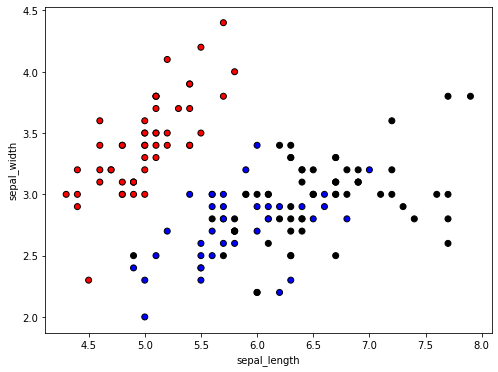

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('iris.csv')
plt.figure(2, figsize=(8, 6))
X = df.iloc[:, :4].values
colors={'setosa':'red','versicolor':'blue','virginica':'black'}
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.scatter(X[:, 0], X[:, 1],edgecolor='k',c=df["species"].map(colors))
# for temp in pre:
#     plt.scatter(temp[0],temp[1],c='yellow')
plt.show()
